In [1]:
import os
import sys

from preprocess_data import *
from visualize_data import *
from models import *
from test_parameters import *


# Set up working directory
if os.getcwd().endswith("notebooks"):
    current_dir = os.getcwd()
    up_dir = current_dir.split("/")[0:-1]
    os.chdir("/".join(up_dir))

# Read the relevant input data
all_data = pd.read_csv("csv_data/07_feature_engineering_and_cleaning.csv")
X = all_data.drop(["location", "date", "zika_cases"], axis=1).values
y = all_data["zika_cases"].values
# Read the small dataset
with open("csv_data/X.pkl", "rb") as f:
    X_small = dill.load(f)
with open("csv_data/y.pkl", "rb") as f:
    y_small = dill.load(f)

# Make sure to use CPU for these small models
setup_gpu(gpu=False)

Using TensorFlow backend.


## Input Data

Number of non-zika cases: 100974
Number of zika cases: 15135
Percent of non-zika cases: 86.9648347673307
Percent of zika cases: 13.035165232669302
Total number of rows: 116109


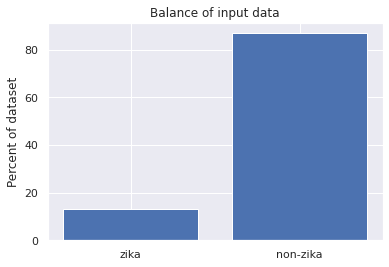

Number of non-zika cases: 209
Number of zika cases: 1004
Percent of non-zika cases: 17.230008244023086
Percent of zika cases: 82.76999175597692
Total number of rows: 1213


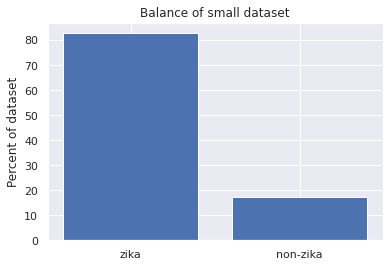

In [2]:
# Plot data balance for large dataset
view_data_balance(X, y, data_type="input data")

# Plot balance for small dataset
view_data_balance(X_small, y_small, data_type="small dataset")

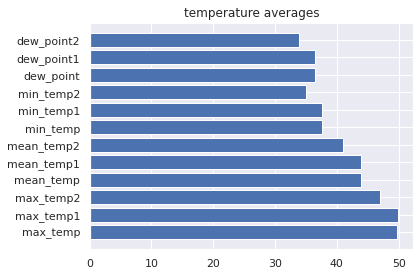

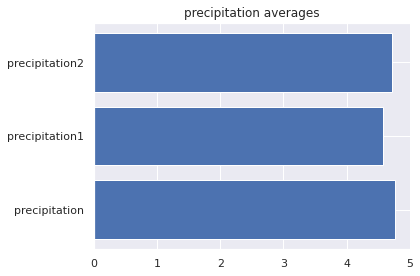

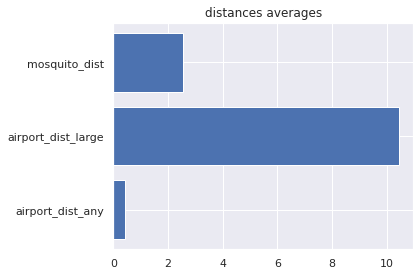

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot the averages for each data column
plot_averages(all_data)

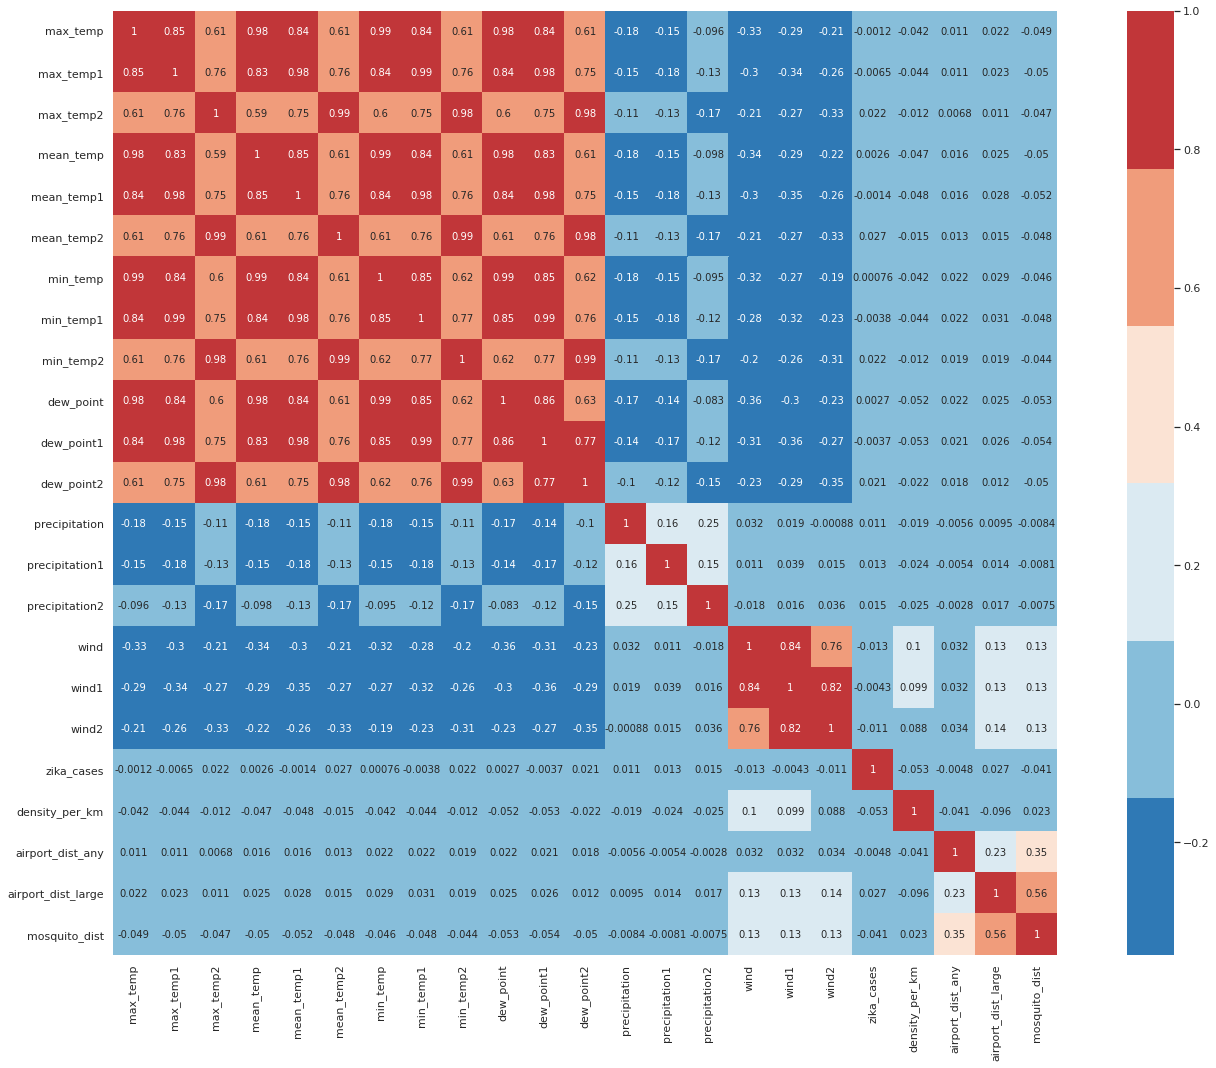

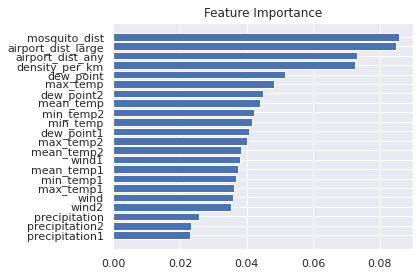

<Figure size 432x288 with 0 Axes>

In [4]:
# Look at correlation between features and the number of cases
plot_feature_output_correlation(all_data)

## Classifiers
### Accuracy as a function of date

In [5]:
# Read in the data as a function of the date
data_list = get_data(data_choice="by_date")

# Set up parameters
simple_params = {
    "epochs": [10],
    "batch_size": [100]
}
neighbours = [1, 2, 5, 10, 20, 50, 100]


# Set up empty variables
best_results = {
    "simple_classifier": [],
    "svm": [],
    "knn": []
}
dates = []

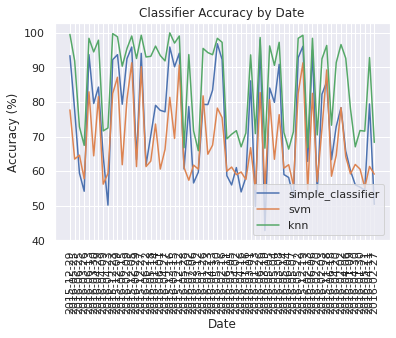

<Figure size 432x288 with 0 Axes>

In [6]:
for data in data_list:
    # If all the training data for this date is the same, then don't use this date
    if len(np.unique(data["y_train"])) == 1:
        continue

    # Test the simple classifier parameters
    simple_classifier = build_simple_classifier(data["X_train"])
    simple_classifier_results = test_simple_classifier(
                simple_classifier,
                data,
                simple_params,
            )

    # Test SVM
    svm_classifier = build_svm()
    svm_results = model_predict(
                'svm',
                svm_classifier,
                data,
            )

    # Test KNN
    knn_results = test_knn(data, neighbours)

    # Visualize results
    all_results = [simple_classifier_results, [svm_results], knn_results]

    # Sort all results
    for result_list in all_results:
        # Sort according to accuracy
        sorted_list = sorted(result_list, key=itemgetter("accuracy"), reverse=True)
        result = sorted_list[0]
        best_results[result["name"]].append(result["accuracy"]*100)

    dates.append(data["date"])


plot_accuracy_by_date(dates, best_results)

### Simple Classifier